In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Polynomial Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
indata = pd.read_excel(open('PolyData.xlsx', 'rb'),sheet_name='Sheet1')  

In [11]:
indata.head()
indata.shape

,hardwood_conc,tensile_strength
0,1.0,6.3
1,1.5,11.1
2,2.0,20.0
3,3.0,24.0
4,4.0,26.1


(19, 2)

<AxesSubplot:xlabel='hardwood_conc', ylabel='tensile_strength'>

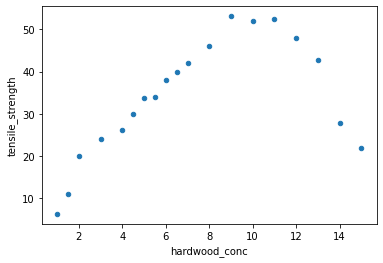

In [14]:
indata.plot.scatter('hardwood_conc', 'tensile_strength')

In [4]:
x = np.array(indata['hardwood_conc'])
y = indata['tensile_strength']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std = False)
scaler.fit(x.reshape(-1,1))
scaled_feat = scaler.transform(x.reshape(-1,1))


StandardScaler(with_std=False)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly =PolynomialFeatures(degree=2, include_bias=False)

In [17]:
poly_features = poly.fit_transform(scaled_feat.reshape(-1,1))

In [20]:
poly_features

array([[-6.26315789, 39.22714681],
       [-5.76315789, 33.21398892],
       [-5.26315789, 27.70083102],
       [-4.26315789, 18.17451524],
       [-3.26315789, 10.64819945],
       [-2.76315789,  7.63504155],
       [-2.26315789,  5.12188366],
       [-1.76315789,  3.10872576],
       [-1.26315789,  1.59556787],
       [-0.76315789,  0.58240997],
       [-0.26315789,  0.06925208],
       [ 0.73684211,  0.54293629],
       [ 1.73684211,  3.0166205 ],
       [ 2.73684211,  7.49030471],
       [ 3.73684211, 13.96398892],
       [ 4.73684211, 22.43767313],
       [ 5.73684211, 32.91135734],
       [ 6.73684211, 45.38504155],
       [ 7.73684211, 59.85872576]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
poly_reg_model = LinearRegression()
polymodel = poly_reg_model.fit(poly_features, y)

In [23]:
polymodel.coef_
polymodel.intercept_
polymodel.score(poly_features, y)

array([ 2.54634404, -0.63454917])

45.29497313476155

0.9085019647037845

In [24]:
import statsmodels.api as sm
X = sm.add_constant(poly_features)
polym = sm.OLS(y, X)
polymfit = polym.fit()
print(polymfit.summary())

from statsmodels.formula.api import ols
andata = pd.DataFrame(list(zip(y, X)))
lm=ols('y~X', data = andata).fit()
table=sm.stats.anova_lm(lm)
print(table)

                            OLS Regression Results                            
Dep. Variable:       tensile_strength   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     79.43
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           4.91e-09
Time:                        07:49:27   Log-Likelihood:                -53.566
No. Observations:                  19   AIC:                             113.1
Df Residuals:                      16   BIC:                             116.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2950      1.483     30.545      0.0

/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Actuals vs Regression Line')

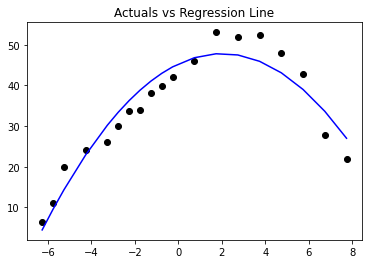

In [25]:
y_predicted = polymodel.predict(poly_features)
plt.plot(poly_features[:,0], y, 'o', color='black');
plt.plot(poly_features[:,0],y_predicted,color='blue')
plt.title("Actuals vs Regression Line")

Text(0.5, 1.0, 'Residual Plot')

Text(0.5, 0, 'Independent Variable')

Text(0, 0.5, 'Residual')

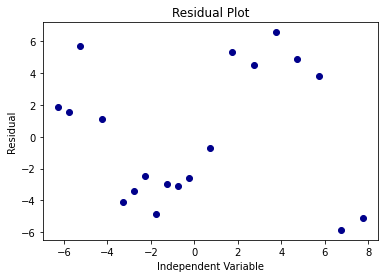

In [26]:
residuals = y-y_predicted
plt.plot(poly_features[:,0],residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

Test if the quadratic term is contributing to the model

$H_0$: $\beta_2 = 0$
vs 
$H_1$: $\beta_2 \neq 0$


Using the Extra Sum of Squares Method

Compute Sum of Squares of Regression and compute the F statistic

In [27]:
X = sm.add_constant(poly_features[:,0])
polym = sm.OLS(y, X)
polymfit = polym.fit()
print(polymfit.summary())

from statsmodels.formula.api import ols
andata = pd.DataFrame(list(zip(y, X)))
lm=ols('y~X', data = andata).fit()
table=sm.stats.anova_lm(lm)
print(table)

                            OLS Regression Results                            
Dep. Variable:       tensile_strength   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     7.474
Date:                Tue, 22 Mar 2022   Prob (F-statistic):             0.0141
Time:                        07:52:29   Log-Likelihood:                -72.823
No. Observations:                  19   AIC:                             149.6
Df Residuals:                      17   BIC:                             151.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.1842      2.711     12.611      0.0

/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


$SS_R(\beta_2 | \beta_1, \beta_0) = SS_R(\beta_1, \beta_2 | \beta_0) - SS_R(\beta_1| \beta_0)$
=3109.395976 - 1383.384142

In [28]:
(3109.395976 - 1383.384142)

1726.0118339999997

$F_0 = \frac{SS_R(\beta_2 | \beta_1, \beta_0) /1}{MS_{Res}}$

In [29]:
from scipy.stats import f
f.ppf(1-.01, 1, 16)

8.53096528589621

## Trees and Forests


In [38]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

from sklearn.metrics import roc_auc_score

df = pd.read_csv("titanic_train.csv") 

# Data cleaning, Pre-processing

In [39]:
df = df.drop(['Ticket','Cabin', 'Name', 'PassengerId'], axis=1)
# Impute median Age for NA Age values
imputed_age = df["Age"].median()
new_age_var = np.where(df["Age"].isnull(), imputed_age, df["Age"])

df["Age"] = new_age_var
df = df.dropna()
df.shape
df.head().T

(889, 8)

,0,1,2,3,4
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Embarked,S,C,S,S,S


In [40]:
df_train, df_val = train_test_split(df, test_size=0.33, random_state=11)

y_train = df_train.Survived.values
y_val = df_val.Survived.values

del df_train['Survived']
del df_val['Survived']

In [41]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')


In [42]:

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

categorical = ['Pclass', 'Sex', 'Embarked']
numerical = ['Age', 'Fare', 'SibSp', 'Parch']

y_train = df.Survived.values

label_encoder = preprocessing.LabelEncoder()


encoded_sex = label_encoder.fit_transform(df["Sex"])
encoded_class = label_encoder.fit_transform(df["Pclass"])


train_features = pd.DataFrame([encoded_class,
                              encoded_sex,
                              df["Age"]]).T

train_features = train_features.rename(columns={0: "class", 1: "sex", 2:"age"})


Fit a decision tree

In [55]:

decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train, y_train)

In [56]:

y_pred = decisiontree.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9994244190229513

In [45]:
y_pred = decisiontree.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.765229044834308

Prunning the tree

In [46]:
decisiontree3 = DecisionTreeClassifier(random_state=0, max_depth = 3)
model = decisiontree3.fit(X_train, y_train)
y_pred = decisiontree3.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)
y_pred = decisiontree3.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8478967311797011

0.8703216374269006

Overfitting

In [47]:
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

model_entropy = decisiontree_entropy.fit(X_train, y_train)

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0, n_estimators=5)

model = randomforest.fit(X_train, y_train)

In [49]:
y_pred = randomforest.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8524122807017545

#### What is optimal value of n_estimators (aka number of decision trees)?

In [50]:
aucs = []
for i in range(3, 50, 1):
    randomf = RandomForestClassifier(n_estimators=i, random_state=3)
    randomf.fit(X_train, y_train)
    y_pred = randomf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)
    


RandomForestClassifier(n_estimators=3, random_state=3)

RandomForestClassifier(n_estimators=4, random_state=3)

RandomForestClassifier(n_estimators=5, random_state=3)

RandomForestClassifier(n_estimators=6, random_state=3)

RandomForestClassifier(n_estimators=7, random_state=3)

RandomForestClassifier(n_estimators=8, random_state=3)

RandomForestClassifier(n_estimators=9, random_state=3)

RandomForestClassifier(n_estimators=10, random_state=3)

RandomForestClassifier(n_estimators=11, random_state=3)

RandomForestClassifier(n_estimators=12, random_state=3)

RandomForestClassifier(n_estimators=13, random_state=3)

RandomForestClassifier(n_estimators=14, random_state=3)

RandomForestClassifier(n_estimators=15, random_state=3)

RandomForestClassifier(n_estimators=16, random_state=3)

RandomForestClassifier(n_estimators=17, random_state=3)

RandomForestClassifier(n_estimators=18, random_state=3)

RandomForestClassifier(n_estimators=19, random_state=3)

RandomForestClassifier(n_estimators=20, random_state=3)

RandomForestClassifier(n_estimators=21, random_state=3)

RandomForestClassifier(n_estimators=22, random_state=3)

RandomForestClassifier(n_estimators=23, random_state=3)

RandomForestClassifier(n_estimators=24, random_state=3)

RandomForestClassifier(n_estimators=25, random_state=3)

RandomForestClassifier(n_estimators=26, random_state=3)

RandomForestClassifier(n_estimators=27, random_state=3)

RandomForestClassifier(n_estimators=28, random_state=3)

RandomForestClassifier(n_estimators=29, random_state=3)

RandomForestClassifier(n_estimators=30, random_state=3)

RandomForestClassifier(n_estimators=31, random_state=3)

RandomForestClassifier(n_estimators=32, random_state=3)

RandomForestClassifier(n_estimators=33, random_state=3)

RandomForestClassifier(n_estimators=34, random_state=3)

RandomForestClassifier(n_estimators=35, random_state=3)

RandomForestClassifier(n_estimators=36, random_state=3)

RandomForestClassifier(n_estimators=37, random_state=3)

RandomForestClassifier(n_estimators=38, random_state=3)

RandomForestClassifier(n_estimators=39, random_state=3)

RandomForestClassifier(n_estimators=40, random_state=3)

RandomForestClassifier(n_estimators=41, random_state=3)

RandomForestClassifier(n_estimators=42, random_state=3)

RandomForestClassifier(n_estimators=43, random_state=3)

RandomForestClassifier(n_estimators=44, random_state=3)

RandomForestClassifier(n_estimators=45, random_state=3)

RandomForestClassifier(n_estimators=46, random_state=3)

RandomForestClassifier(n_estimators=47, random_state=3)

RandomForestClassifier(n_estimators=48, random_state=3)

RandomForestClassifier(n_estimators=49, random_state=3)

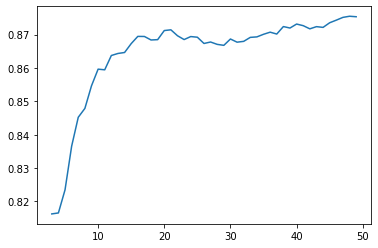

In [51]:
plt.plot(range(3, 50, 1), aucs)

In [52]:
all_aucs = {}
for depth in [5, 10, 20]:
    aucs = []
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    all_aucs[depth] = aucs

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=30, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=40, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=60, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=70, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=80, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=90, random_state=1)

RandomForestClassifier(max_depth=5, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=110, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=120, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=130, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=140, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=160, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=170, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=180, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=190, random_state=1)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=40, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=60, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=70, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=80, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=90, random_state=1)

RandomForestClassifier(max_depth=10, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=110, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=120, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=130, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=140, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=160, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=170, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=180, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=190, random_state=1)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=30, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=40, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=60, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=70, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=80, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=90, random_state=1)

RandomForestClassifier(max_depth=20, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=110, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=120, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=130, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=140, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=150, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=160, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=170, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=180, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=190, random_state=1)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=1)

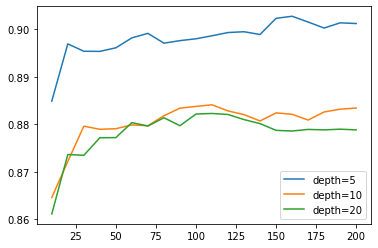

In [53]:
num_trees = list(range(10, 201, 10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()

#### Identifying important features

In [ ]:
importances = model...

In [ ]:
indices = np.argsort(importances)[::-1]
names = [dv.feature_names_[i] for i in indices]

In [ ]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]),names, rotation=90)
plt.show()

## Support Vector Machines

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv("data/titanic_train.csv") 

df = df.drop(['Ticket','Cabin', 'Name', 'PassengerId'], axis=1)
# Impute median Age for NA Age values
imputed_age = df["Age"].median()
new_age_var = np.where(df["Age"].isnull(), imputed_age, df["Age"])


df["Age"] = new_age_var
df = df.dropna()
df.shape
df.head().T

df_train, df_val = train_test_split(df, test_size=0.33, random_state=11)

y_train = df_train.Survived.values
y_val = df_val.Survived.values

del df_train['Survived']
del df_val['Survived']
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [ ]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])


svm_clf = svm_clf.fit(..., ...)

accuracy_score(y_val, svm_clf.predict(...))
print(classification_report(y_val, svm_clf.predict(X_val), sample_weight=None, digits=4))

In [ ]:


polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=..., loss="hinge"))
    ])

poly_svm_clf = polynomial_svm_clf.fit(X_train, y_train)
accuracy_score(y_val, poly_svm_clf.predict(...))
print(classification_report(y_val, poly_svm_clf.predict(X_val), sample_weight=None, digits=4))

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=...))
    ])
poly_kernel_svm=poly_kernel_svm_clf.fit(X_train, y_train)
accuracy_score(y_val, poly_kernel_svm.predict(X_val))
print(classification_report(..., poly_kernel_svm.predict(X_val), sample_weight=None, digits=4))